In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import warnings
import pygad
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dj38.tsp', sep=" ", skiprows=10, header=None)
df=df.drop(df.columns[[0]], axis = 1)
df.columns=list(['x','y'])
df_ = np.asarray(df)
df

,x,y
0,11003.6111,42102.5000
1,11108.6111,42373.8889
2,11133.3333,42885.8333
3,11155.8333,42712.5000
4,11183.3333,42933.3333
5,11297.5000,42853.3333
6,11310.2778,42929.4444
7,11416.6667,42983.3333
8,11423.8889,43000.2778
9,11438.3333,42057.2222


In [3]:
# calculate the distance 
def distance(route):
    distance=0
    for i in range(len(route)-1):
        p=df_[route[i+1]]-df_[route[i]]
        dis=math.hypot(p[0],p[1])
        distance=distance+dis
    p=df_[route[-1]]-df_[route[0]]
    # distance between last and fist city
    distance=distance+math.hypot(p[0],p[1])
    return distance

In [4]:
# plot the route
def plot_route(route_best):
    df_route=df.iloc[route_best]
    df_route.loc['origin'] =df_route.iloc[0]
    cities_route = np.asarray(df_route)

    plt.scatter(df_[:,0],df_[:,1])
    plt.plot(cities_route[:,0],cities_route[:,1])
    plt.show()
    print("Route: " + str(route_best) + "\n\nDistance_scaled: "+ str(distance(route_best)) )

In [5]:
def Monte_Carlo(N):
    time_start=datetime.datetime.now()
    print("start:",time_start)   
    #dis_min=distance(np.arange(df.shape[0]))
    #dis_min=distance(np.random.choice(df.shape[0],df.shape[0],replace=False))
    dis_min=100000000
    dis_min_distribution=[]
    route_best=0
    for i in range(0,N):
        # Monte Carlo sampling  
        route=np.random.choice(df.shape[0],df.shape[0],replace=False)
        dis=distance(route)
        if dis  < dis_min:
            dis_min=dis
            route_best=route
            print("route_best",route_best)   
            print("dis_min",dis_min)           
        dis_min_distribution.append(dis_min)    
        
    time_end=datetime.datetime.now()
    duration=time_end-time_start
    print("end:",time_end)
    print("duration:",duration)
    
    return route_best,dis_min_distribution,duration

In [6]:
N=1000000
route_best,dis_min_distribution,duration=Monte_Carlo(N)

start: 2022-01-02 18:49:23.523393
route_best [ 0 28 11 17 20  1 25 37  4 35 19 10 27 14 24 26 18  5  7 31  8 21 33 23
 16 13 22 30 36  2 34  3 29  9 15 12  6 32]
dis_min 30543.01216567015
route_best [12 18 26 31  4 20  7 11  5 32 28 27 25 16 24 23 34 15 22 29 36 19 37  6
  9 30  2  0 17  3 10  1 21 33  8 35 14 13]
dis_min 30347.3966802772
route_best [26  2 11 22  3 28 30 15 31  7 17 29 32 10 36 19  4 27 33 37 24 13  8 12
  0 25 21 35  1  5 20 14 16  6 23  9 34 18]
dis_min 28481.242481172572
route_best [22  0 35 32 34  5 19 13 15  6  3 10 24 16  2 21 27  1 30 31 26 11 37 29
 33 17 28 36  4 14 23  7 12  9  8 25 18 20]
dis_min 28010.419917686322
route_best [ 8  9 35 33 31 10 28 34 14 18 29 23 15  5 12  3 26  6  7 25  4 13 32 24
 21 20 37 30  0  1 11 19 36 16 22 17 27  2]
dis_min 27306.04714480165
route_best [17 35  7 12 31 11 14  1  6 30 16 23  4 26  0 15 29 13  2  3 36 20 37 34
 27  5 10 33 32 21  8 18 22 28 24 19  9 25]
dis_min 26494.61769361078
route_best [10 34  8 29 14 24 25 21 20  0

In [7]:
route_best

array([17, 33, 32, 35, 37, 36, 31, 25, 10, 22, 24,  8,  2, 11,  0, 20, 29,
       34, 21, 19,  3,  7,  6, 26, 27, 23, 15, 30, 12, 18, 16,  9,  1,  4,
        5, 14, 13, 28])

In [8]:
distance(route_best)

18649.639967298306

Text(0, 0.5, 'distance')

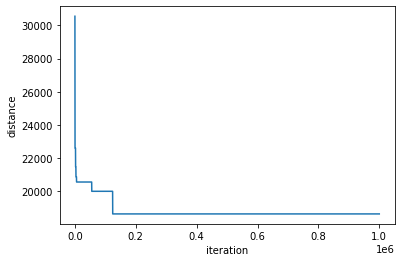

In [9]:
dis_shortest,=plt.plot(range(N),dis_min_distribution)
plt.xlabel("iteration")
plt.ylabel("distance")

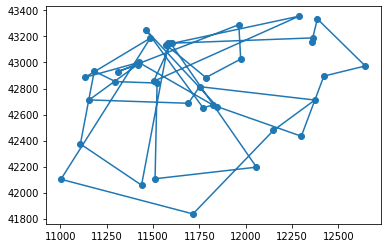

Route: [17 33 32 35 37 36 31 25 10 22 24  8  2 11  0 20 29 34 21 19  3  7  6 26
 27 23 15 30 12 18 16  9  1  4  5 14 13 28]

Distance_scaled: 18649.639967298306


In [10]:
plot_route(route_best)